# Instagram Research Analysis

In [79]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import plotly.express as px
import sklearn 
import seaborn as sns
from wordcloud import WordCloud,STOPWORDS,ImageColorGenerator


This practise is aiming at analyzing the reach of a Instagram Account 


1. Task of Instagrem Research Analysis 
2. Prediction with Machine Learning

Impressions track the number of times your content (including stories and posts) is shown to users on the platform. In other words, if someone is scrolling their feed and passes by your post, that's an impression.

## 1. Instagram Reach Analysis using Python

### 1.1 Load Dataset

In [80]:
data = pd.read_csv("Instagram.csv",encoding='latin1')
data.head(n=3)

,Impressions,From Home,From Hashtags,From Explore,From Other,Saves,Comments,Shares,Likes,Profile Visits,Follows,Caption,Hashtags
0,3920.0,2586.0,1028.0,619.0,56.0,98.0,9.0,5.0,162.0,35.0,2.0,Here are some of the most important data visua...,#finance #money #business #investing #investme...
1,5394.0,2727.0,1838.0,1174.0,78.0,194.0,7.0,14.0,224.0,48.0,10.0,Here are some of the best data science project...,#healthcare #health #covid #data #datascience ...
2,4021.0,2085.0,1188.0,0.0,533.0,41.0,11.0,1.0,131.0,62.0,12.0,Learn how to train a machine learning model an...,#data #datascience #dataanalysis #dataanalytic...


### 1.2 Check the null

In [81]:
data.isnull().sum()

Impressions       1
From Home         1
From Hashtags     1
From Explore      1
From Other        1
Saves             1
Comments          1
Shares            1
Likes             1
Profile Visits    1
Follows           1
Caption           1
Hashtags          1
dtype: int64

In [82]:
data.dropna(inplace=True)

data.isnull().sum()

Impressions       0
From Home         0
From Hashtags     0
From Explore      0
From Other        0
Saves             0
Comments          0
Shares            0
Likes             0
Profile Visits    0
Follows           0
Caption           0
Hashtags          0
dtype: int64

### 1.3 DataFrame Information

In [83]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99 entries, 0 to 98
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Impressions     99 non-null     float64
 1   From Home       99 non-null     float64
 2   From Hashtags   99 non-null     float64
 3   From Explore    99 non-null     float64
 4   From Other      99 non-null     float64
 5   Saves           99 non-null     float64
 6   Comments        99 non-null     float64
 7   Shares          99 non-null     float64
 8   Likes           99 non-null     float64
 9   Profile Visits  99 non-null     float64
 10  Follows         99 non-null     float64
 11  Caption         99 non-null     object 
 12  Hashtags        99 non-null     object 
dtypes: float64(11), object(2)
memory usage: 10.8+ KB


### 1.4 Analyzing Instagram Reach

1.4.1 Reach at Home

Available style in pyplot :
['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


Text(0.5, 1.0, 'Distribution of Impressions From Home')

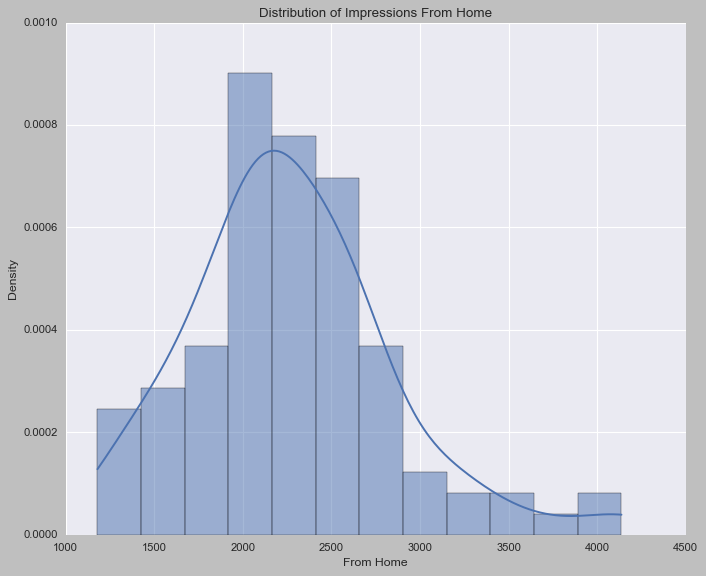

In [84]:
plt.figure(figsize=(10,8))
home= data['From Home']

print("Available style in pyplot :\n{}".format(plt.style.available))


plt.style.use('seaborn')
sns.histplot(data=home,kde=True,stat='density')
plt.title("Distribution of Impressions From Home")

1.4.2 Impression from Hashtags

Hashtags are tools we use to categorize our posts on Instagram so that we can reach more people based on the kind of contenets we are creating

Text(0.5, 1.0, 'Distribution of Impressions From Hashtags')

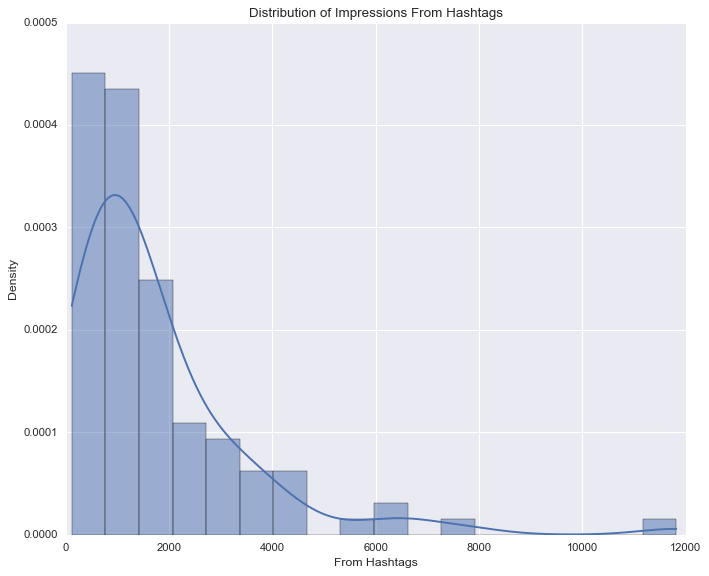

In [85]:
plt.figure(figsize=(10,8))
hashtags = data['From Hashtags']

plt.style.use('seaborn')

sns.histplot(data=hashtags,kde=True,stat='density')
plt.title("Distribution of Impressions From Hashtags")

1.4.3 Impression from Explore

Text(0.5, 1.0, 'Distribution of Impressions From Explores')

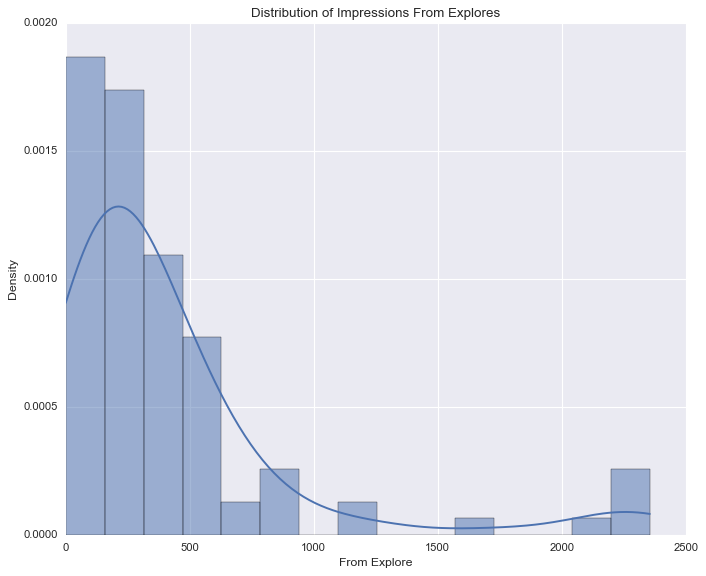

In [86]:
plt.figure(figsize=(10,8))
explore = data['From Explore']

plt.style.use('seaborn')

sns.histplot(data=explore,kde=True,stat='density')
plt.title("Distribution of Impressions From Explores")

1.5 Percentage of Impression

([<matplotlib.patches.Wedge at 0x28ab9e7f0>,
 [Text(1.2299553862384283, -0.010476061429718247, 'From Home'),
  Text(-0.29368246784082463, 1.0600710391680943, 'From Explore'),
  Text(-1.081384569795076, -0.20151280904478225, 'From Hashtags'),
  Text(-0.10384510094838328, -1.0950873001770316, 'From Other')],
 [Text(0.7299735219138638, -0.006217499872922211, '49.73'),
  Text(-0.16019043700408617, 0.5782205668189604, '9.14'),
  Text(-0.5898461289791322, -0.1099160776607903, '38.12'),
  Text(-0.056642782335481784, -0.5973203455511081, '3.01')])

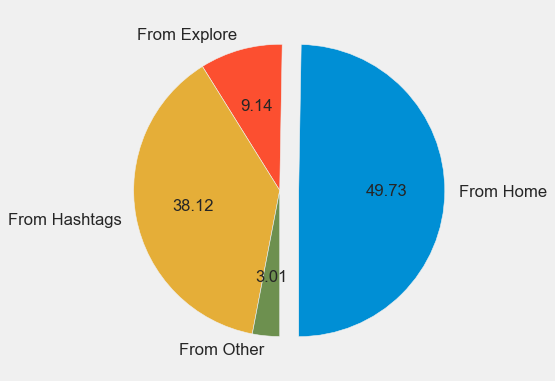

In [87]:
val_home = home.values.sum()
val_explore = explore.values.sum()
val_hashtags = hashtags.values.sum()
val_other = data['From Other'].values.sum()

labels  = ['From Home','From Explore','From Hashtags','From Other']
values = [val_home,val_explore,val_hashtags,val_other]

plt.style.use("fivethirtyeight")

plt.pie(x=values,labels=labels,
        autopct='%.2f',textprops={'fontsize':15},
        explode=(0.13,0,0,0),startangle=-90)



In [88]:
plt.figure(figsize=(10,8))
px.pie(values=values,names=labels,title='Impression Distribution from Various Sources',hole=0.5)

<Figure size 800x640 with 0 Axes>

In [89]:
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
print(len(ENGLISH_STOP_WORDS))
print(len(STOPWORDS))

318
192


### 1.5 Analyzing Content by Wordclouds

1.5.1 Analyzing Content of Captions

(-0.5, 399.5, 199.5, -0.5)

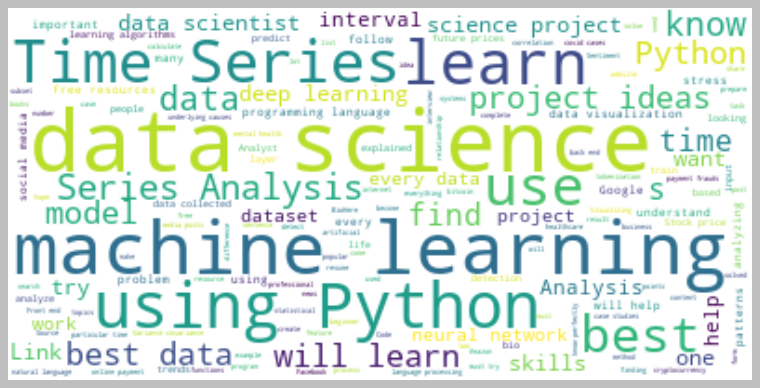

In [90]:
text = "".join(text for text in data['Caption'] )
stopwords = set(STOPWORDS)

wordcloud = WordCloud(stopwords=stopwords,background_color='white').generate(text=text)
plt.style.use('classic')
plt.figure(figsize=(12,10))
plt.imshow(wordcloud)
plt.axis('off')



1.5.2 Analyzing contents of hashtags 

(-0.5, 399.5, 199.5, -0.5)

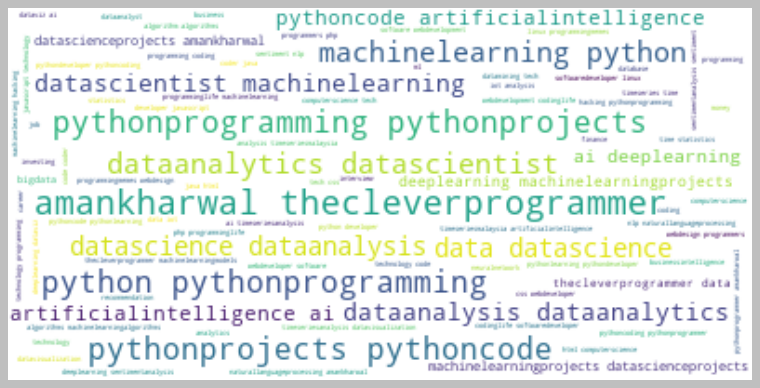

In [91]:
text = "".join(text for text in data['Hashtags'] )
stopwords = set(STOPWORDS)

wordcloud = WordCloud(stopwords=stopwords,background_color='white').generate(text=text)
plt.style.use('classic')
plt.figure(figsize=(12,10))
plt.imshow(wordcloud)
plt.axis('off')



### 1.6 Analyzing Relationships

1.6.1 Relationship between number of likes and impressions

In [92]:
px.scatter(data_frame=data,x='Impressions',y = 'Likes',size='Likes',trendline='ols',title='Relationship between Likes and Impressions')


1.6.2 Relationship Between Comments and Impressions

In [93]:

figure =px.scatter(data_frame=data,x='Impressions',y='Comments',size='Comments',trendline='ols',title='Relationship Between Comments and Impressions')
figure.show()

1.6.3 Relationship between Shares and Impressions

In [94]:

figure =px.scatter(data_frame=data,x='Impressions',y='Shares',size='Shares',trendline='ols',title='Relationship Between Shares and Impressions')
figure.show()

1.6.4 Relationship between Saves and Impression

In [95]:

figure =px.scatter(data_frame=data,x='Impressions',y='Saves',size='Saves',trendline='ols',title='Relationship Between Saves and Impressions')
figure.show()

1.6.5 Correlation between datas

In [96]:
correlation = data.corr()
print(correlation['Impressions'].sort_values(ascending=False))

Impressions       1.000000
Likes             0.896277
From Hashtags     0.892682
Follows           0.804064
Profile Visits    0.774393
Saves             0.625600
From Home         0.603378
From Explore      0.498389
Shares            0.476617
From Other        0.429227
Comments          0.247201
Name: Impressions, dtype: float64


### 1.7 Analyzing Conversion Rate

In Instagram, conversion rate means how many followers you are getting from the number of profile visit from a post.

Conversion Rate = ${N_{Follwers}}\over{N_{ProfileVisitors}} $

In [97]:
conversion_rate = (data['Follows'].sum()/data['Profile Visits'].sum())*100
print("Conversion Rate = {:.2f}%".format(conversion_rate))

Conversion Rate = 31.18%


In [98]:

figure =px.scatter(data_frame=data,x='Profile Visits',y='Follows',size='Follows',trendline='ols',title='Relationship Between Follows and Profile Visits')
figure.show()

# 2  Prediction Model of Instagram Reach 

In [99]:
X = data.loc[:,'Saves':'Follows']
y  = data.Impressions

print(X.shape)
print(y.shape)

(99, 6)
(99,)


In [100]:
from sklearn.model_selection import train_test_split ,GridSearchCV,cross_val_score
from sklearn.linear_model import Ridge,PassiveAggressiveRegressor
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures

X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=50)

pipe_Ridge = make_pipeline(Ridge())
pipe_gbr = make_pipeline(GradientBoostingRegressor())
pipe_svr = make_pipeline(SVR())
pipe_passive = make_pipeline(PassiveAggressiveRegressor())


pipe_model = [pipe_Ridge,pipe_gbr,pipe_svr,pipe_passive]

best_socre = 0
best_model ='1'
for model in pipe_model:
    # print(model.steps[-1].__class__.__name__)
    score = cross_val_score(estimator=model,X=X_train,y=y_train,cv=5).mean()
    
    if score > best_socre:
        best_socre = score
        best_model=model.steps[-1][0]
        

print(best_socre)
print(best_model)



0.7928535337296241
ridge


By comparison, for this regression problem, the best model should be Passiveaggressiverregressor

Then let's find the best parameters for it in this case

In [101]:
param_grid = {'passiveaggressiveregressor__C':[0.001,0.01,0.1,1,10,100]}

grid = GridSearchCV(estimator=pipe_passive,param_grid=param_grid,cv=5).fit(X_train,y_train)

print("The best parameters : \n{}".format(grid.best_params_))
print("The best score {:.2f}".format(grid.best_score_))
print('The socre on test set {:.2f}'.format(grid.score(X_test,y_test)))

The best parameters : 
{'passiveaggressiveregressor__C': 0.001}
The best score 0.87
The socre on test set 0.89


In [105]:
best_para = grid.best_params_['passiveaggressiveregressor__C']
print(best_para)
pipe_Ridge = make_pipeline(PassiveAggressiveRegressor(C=best_para)).fit(X_train,y_train)


0.001


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:1527: ConvergenceWarning:

Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.



In [106]:
print('The score on test set {:.2f}'.format(pipe_Ridge.score(X_test,y_test)))


The score on test set -4.43


In [104]:
New_features = np.array([[282,233,4,9,165,54]])
print("Prediction of new data :\n Impression = {}".format(pipe_Ridge.predict(New_features)))

Prediction of new data :
 Impression = [739.99999999]


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

